In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import torch
import pickle as pkl
import numpy as np
import os 
from torchvision import transforms
from torchvision import datasets
from matplotlib import pyplot as plt

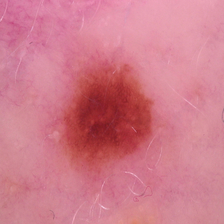

In [3]:
from IPython.display import Image
Image('/content/gdrive/My Drive/skin-cancer-dataset/train/benign/797.jpg')

In [0]:
def get_data(batch_size,image_size,path='/content/gdrive/My Drive/skin-cancer-dataset/'):
  
    normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
  
    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalization
    ])
    
    dataset_train = datasets.ImageFolder(os.path.join(path,'train'),transform = transform)
    dataset_test = datasets.ImageFolder(os.path.join(path,'test'),transform = transform)
    
    dataloader_train = torch.utils.data.DataLoader(dataset = dataset_train,batch_size = batch_size,shuffle=True)  
    dataloader_test = torch.utils.data.DataLoader(dataset = dataset_test,batch_size = batch_size,shuffle=True)  
    
    return dataloader_train,dataloader_test
  
data_train,data_test = get_data(128,244)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)
torch.Size([128])


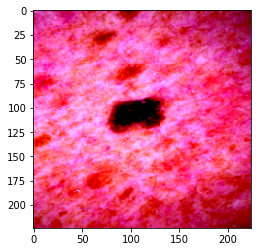

In [5]:
for idx,(data,label) in enumerate(data_train):
  if idx == 1 :
    print(label[3])
    print(np.shape(label))
    npimg = data[3].numpy()
    plt.imshow(np.transpose(npimg))
    break

In [0]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

In [7]:
model = models.vgg16(pretrained=True)

for param in model.parameters():
  param.requires_grad = False

use_cuda = torch.cuda.is_available()

print(use_cuda)

if use_cuda:
  model = model.cuda()



Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 132805845.20it/s]


True


In [8]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
model.classifier = nn.Sequential(nn.Linear(25088,4096),
                                 nn.ReLU(inplace=True),
                                 nn.Dropout(0.3),
                                 nn.Linear(4096,128),
                                 nn.ReLU(inplace=True),
                                 nn.Dropout(0.3),
                                 nn.Linear(128,2))

In [13]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [0]:
def train(epochs,loaders,model,optimizer,criterion,use_cuda,path):
  
  for epoch in range(0,epochs+1):
    
    train_loss = 0.0
    
    model.train()
    
    for idx,(data,target) in enumerate(loaders):
      
      if use_cuda :
        
        data = data.cuda()
        target = target.cuda()
        
      optimizer.zero_grad()
      
      output = model(data)
      
      loss = criterion(output,target)
      
      loss.backward()
      
      optimizer.step()
      
      train_loss = train_loss + ((1 / (idx +1)) * (loss.data - train_loss))
      
      if idx % 4 == 0:
        print('Epoch %d,Batch %d,Loss %.6f'% (epoch,idx+1,train_loss))
        
      if epoch % 5 == 0:
        torch.save(model.state_dict(),path)
        
  return model

In [16]:
epochs = 10

model.cuda()

path = 'hot_dog_model.pt'

train(epochs,data_train,model,optimizer,criterion,use_cuda,path)

model.load_state_dict(torch.load(path))

Epoch 0,Batch 1,Loss 0.621018
Epoch 0,Batch 5,Loss 0.504324
Epoch 0,Batch 9,Loss 0.467494
Epoch 0,Batch 13,Loss 0.450153
Epoch 0,Batch 17,Loss 0.425745
Epoch 0,Batch 21,Loss 0.415893
Epoch 1,Batch 1,Loss 0.286557
Epoch 1,Batch 5,Loss 0.264502
Epoch 1,Batch 9,Loss 0.259743
Epoch 1,Batch 13,Loss 0.247827
Epoch 1,Batch 17,Loss 0.240767
Epoch 1,Batch 21,Loss 0.233854
Epoch 2,Batch 1,Loss 0.164878
Epoch 2,Batch 5,Loss 0.143641
Epoch 2,Batch 9,Loss 0.140201
Epoch 2,Batch 13,Loss 0.140587
Epoch 2,Batch 17,Loss 0.142843
Epoch 2,Batch 21,Loss 0.145420
Epoch 3,Batch 1,Loss 0.107128
Epoch 3,Batch 5,Loss 0.087946
Epoch 3,Batch 9,Loss 0.081792
Epoch 3,Batch 13,Loss 0.082583
Epoch 3,Batch 17,Loss 0.077684
Epoch 3,Batch 21,Loss 0.080749
Epoch 4,Batch 1,Loss 0.036505
Epoch 4,Batch 5,Loss 0.051893
Epoch 4,Batch 9,Loss 0.046386
Epoch 4,Batch 13,Loss 0.050579
Epoch 4,Batch 17,Loss 0.046103
Epoch 4,Batch 21,Loss 0.045721
Epoch 5,Batch 1,Loss 0.030575
Epoch 5,Batch 5,Loss 0.032667
Epoch 5,Batch 9,Loss 0.03

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [0]:
def test(loaders,model,criterion,use_cuda):
  
  test_loss = 0.
  correct = 0.
  total = 0.
  
  model.eval()
  
  for idx ,(data,target) in enumerate(loaders):
    
    if use_cuda:
      
      data = data.cuda()
      target = target.cuda()
      
    output = model(data)
    
    loss = criterion(output,target)
    
    test_loss = test_loss + ((1 / (idx +1)) * (loss.data - test_loss))
    
    pred = output.data.max(1, keepdim=True)[1]
    
    correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        
    total += data.size(0)
    
  print('Test Loss: %.6f\n'%(test_loss))

  print('Test Accuracy: %2d%% (%2d/%2d)' % ((100. * correct/total),correct,total))

In [18]:
model.cuda()

test(data_test,model,criterion,use_cuda)

Test Loss: 0.699166

Test Accuracy: 81% (407/500)
